In [5]:
import numpy as np
import pandas as pd
import math
from IPython.display import Image
from scipy import signal
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

## Def convolution

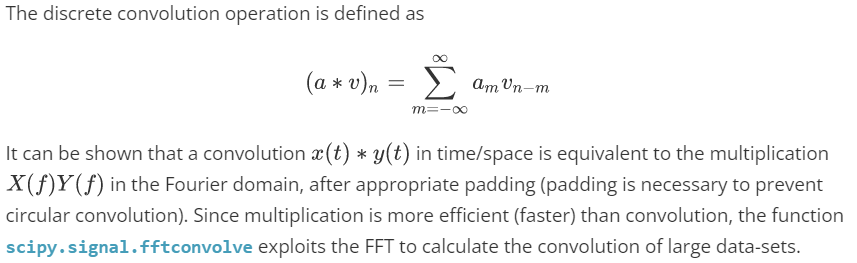

In [6]:
Image('./img/def_conv.png')

In [7]:
# signal = a, system = v
# iter = n, j = m 
def convolution(signal, system):
    out_len = len(signal) + len(system) - 1 # output length
    output = [0] * out_len # output array
    for iter in range(out_len): # iterate over output array
        begin = max(0, iter - len(system) + 1) # begin index of signal
        end = min(iter + 1, len(signal)) # end index of signal
        for j in range(begin,end):  # iterate over signal
            output[iter] += signal[j] * system[iter - j]    # convolution
    return output


## Task 1:
$$
x[n]={1, 2, 3, 4, 5, 6, 0, 0} 
$$
$$
h[n]= {1, 2, 3, 4, 3, 2, 1, 0} 
$$
Check 
$$
y[n]=x[n]*h[n]　　and　　 y[n]=h[n]*x[n] 
$$

In [8]:
x,h = [1, 2, 3, 4, 5, 6, 0, 0],[1, 2, 3,4, 3, 2, 1, 0]
# My formula
print(convolution(x,h)) # y[n] = x[n] * h[n]
print('------------------')
print(convolution(h,x)) # y[n] = h[n] * x[n]
# Numpy formula
print('------------------')
print(np.convolve(x,h)) # y[n] = x[n] * h[n]
print('------------------')
print(np.convolve(h,x)) # y[n] = h[n] * x[n]


[1, 4, 10, 20, 33, 48, 57, 58, 50, 32, 17, 6, 0, 0, 0]
------------------
[1, 4, 10, 20, 33, 48, 57, 58, 50, 32, 17, 6, 0, 0, 0]
------------------
[ 1  4 10 20 33 48 57 58 50 32 17  6  0  0  0]
------------------
[ 1  4 10 20 33 48 57 58 50 32 17  6  0  0  0]


In [9]:
# Print the output in each iter
signal, system = x, h
out_len = len(signal) + len(system) - 1 # output length
output = [0] * out_len # output array
for iter in range(out_len): # iterate over output array
    begin = max(0, iter - len(system) + 1) # begin index of signal
    end = min(iter + 1, len(signal)) # end index of signal
    print('------------------')
    print('Current  iter : ', iter, ' | begin : ', begin, ' | end : ', end)

    for j in range(begin,end):  # iterate over signal
        output[iter] += signal[j] * system[iter - j]
        print('Current j : ', j, ' | signal[j] : ', signal[j], ' | system[iter - j] : ', system[iter - j], ' | output[iter] : ', output[iter])
    print('Current iter output : ', output[iter])

------------------
Current  iter :  0  | begin :  0  | end :  1
Current j :  0  | signal[j] :  1  | system[iter - j] :  1  | output[iter] :  1
Current iter output :  1
------------------
Current  iter :  1  | begin :  0  | end :  2
Current j :  0  | signal[j] :  1  | system[iter - j] :  2  | output[iter] :  2
Current j :  1  | signal[j] :  2  | system[iter - j] :  1  | output[iter] :  4
Current iter output :  4
------------------
Current  iter :  2  | begin :  0  | end :  3
Current j :  0  | signal[j] :  1  | system[iter - j] :  3  | output[iter] :  3
Current j :  1  | signal[j] :  2  | system[iter - j] :  2  | output[iter] :  7
Current j :  2  | signal[j] :  3  | system[iter - j] :  1  | output[iter] :  10
Current iter output :  10
------------------
Current  iter :  3  | begin :  0  | end :  4
Current j :  0  | signal[j] :  1  | system[iter - j] :  4  | output[iter] :  4
Current j :  1  | signal[j] :  2  | system[iter - j] :  3  | output[iter] :  10
Current j :  2  | signal[j] :  3  

In [10]:
# plot the convolution
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(x)), y=x, name='x[n]'))
fig.add_trace(go.Scatter(x=np.arange(len(h)), y=h, name='h[n]'))
fig.add_trace(go.Scatter(x=np.arange(len(convolution(x,h))), y=convolution(x,h), name='y[n] = x[n] * h[n]'))
fig.add_trace(go.Scatter(x=np.arange(len(convolution(h,x))), y=convolution(h,x), name='y[n] = h[n] * x[n]'))
fig.update_layout(title='Convolution', xaxis_title='n', yaxis_title='y[n]')
fig.show()

## Task 2:  
Impulse response of DTS-10 & DTS-11. (at least 16 coeff.)
* DTS-10  
$y[n] - 0.6y[n-1] = x[n]$  
$y[n] - 1/6 * y[n-1] - 1/6 * y[n-2] = 4x[n]$  
* DTS-11  
$y[n] - y[n-1] - 2y[n-2] = 2x[n] - x[n-1] $

In [11]:
# Def DTS-10 system 1 
def DTS_10_1(x):
    y = np.zeros(len(x))
    for n in range(len(x)):
        if n == 0:
            y[n] = x[n] 
        else:
            y[n] = x[n] + 0.6 * y[n-1]
    return y
# Def DTS-10 system 2
def DTS_10_2(x):
    y = np.zeros(len(x))
    for n in range(len(x)):
        if n == 0:
            y[n] = 4 * x[n]
        elif n == 1:
            y[n] = 4 * 1/6
        else:
            y[n] = 4 * x[n] + 1/6 * y[n-1] + 1/6 * y[n-2]
    return y
# Def DTS-11 system 
def DTS_11(x):
    y = np.zeros(len(x))
    for n in range(len(x)):
        if n == 0:
            y[n] = 2 * x[n]
        elif n == 1:
            y[n] = x[n]
        else:
            y[n] = 2 * x[n] - x[n-1] + y[n-1] + 2 * y[n-2]
    return y

In [12]:
# Impulse response of DTS-10 system 1 at least 16 iterations
x = np.zeros(16)
x[0] = 1
y = DTS_10_1(x)
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(x)), y=x, name='x[n]'))
fig.add_trace(go.Scatter(x=np.arange(len(y)), y=y, name='y[n]'))
fig.update_layout(title='DTS-10 system 1', xaxis_title='n', yaxis_title='y[n]')
fig.show()
print('DTS-10 system 1 output : ', y)


DTS-10 system 1 output :  [1.00000000e+00 6.00000000e-01 3.60000000e-01 2.16000000e-01
 1.29600000e-01 7.77600000e-02 4.66560000e-02 2.79936000e-02
 1.67961600e-02 1.00776960e-02 6.04661760e-03 3.62797056e-03
 2.17678234e-03 1.30606940e-03 7.83641641e-04 4.70184985e-04]


In [13]:
# Impulse response of DTS-10 system 2 at least 16 iterations
x = np.zeros(16)
x[0] = 1
y = DTS_10_2(x)
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(x)), y=x, name='x[n]'))
fig.add_trace(go.Scatter(x=np.arange(len(y)), y=y, name='y[n]'))
fig.update_layout(title='DTS-10 system 2', xaxis_title='n', yaxis_title='y[n]')
fig.show()
print('DTS-10 system 2 : ', y)

DTS-10 system 2 :  [4.00000000e+00 6.66666667e-01 7.77777778e-01 2.40740741e-01
 1.69753086e-01 6.84156379e-02 3.96947874e-02 1.80184042e-02
 9.61886526e-03 4.60621158e-03 2.37084614e-03 1.16284295e-03
 5.88948182e-04 2.91965189e-04 1.46818895e-04 7.31306807e-05]


In [14]:
# Impulse response of DTS-11 system at least 16 iterations
x = np.zeros(16)
x[0] = 1
y = DTS_11(x)
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(x)), y=x, name='x[n]'))
fig.add_trace(go.Scatter(x=np.arange(len(y)), y=y, name='y[n]'))
fig.update_layout(title='DTS-11 system', xaxis_title='n', yaxis_title='y[n]')
fig.show()
print('DTS-11 system : ', y)

DTS-11 system :  [2.0000e+00 0.0000e+00 4.0000e+00 4.0000e+00 1.2000e+01 2.0000e+01
 4.4000e+01 8.4000e+01 1.7200e+02 3.4000e+02 6.8400e+02 1.3640e+03
 2.7320e+03 5.4600e+03 1.0924e+04 2.1844e+04]


## Task 3:  
$$h[n]=DTS-10　and　　 DTS-11$$
$$x[n]={1, 1, 1, 1, 1, 1, 0 ,0}$$　　

$1. h[n]=DTS-10's　y[n]$  
$2. h[n]=DTS-11's　y[n]$  
$Check　y[n]  = x[n] * h[n]$


### 1. h[n] = DTS-10_1's y[n]

In [15]:
x = [1, 1, 1, 1, 1, 1, 0, 0]
h = DTS_10_1(x)
y = convolution(x,h)
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(x)), y=x, name='x[n]'))
fig.add_trace(go.Scatter(x=np.arange(len(h)), y=h, name='h[n]'))
fig.add_trace(go.Scatter(x=np.arange(len(y)), y=y, name='y[n]'))
fig.update_layout(title='DTS-10 system 1', xaxis_title='n', yaxis_title='y[n]')
fig.show()
y = np.array(y)
print('DTS-10 system 1 : ', y.round(5))

DTS-10 system 1 :  [ 1.       2.6      4.56     6.736    9.0416  11.42496 11.85498 11.11299
  9.15299  6.97699  4.67139  2.28803  0.85801  0.       0.     ]


### 2. h[n] = DTS-10_2's y[n]

In [16]:
x = [1, 1, 1, 1, 1, 1, 0, 0]
h = DTS_10_2(x)
# My convolution function
y = convolution(x,h)
# Numpy convolution function
np_y = np.convolve(x,h)


fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(x)), y=x, name='x[n]'))
fig.add_trace(go.Scatter(x=np.arange(len(h)), y=h, name='h[n]'))
fig.add_trace(go.Scatter(x=np.arange(len(y)), y=np_y, name='np_y[n]'))
fig.add_trace(go.Scatter(x=np.arange(len(y)), y=y, name='y[n]'))
fig.update_layout(title='DTS-10 system 2', xaxis_title='n', yaxis_title='y[n]')
fig.show()
y = np.array(y)
print('DTS-10 system 2 : ', y.round(5))

DTS-10 system 2 :  [ 4.       4.66667  9.44444 14.35185 19.96605 25.71965 23.61428 24.22232
 19.44454 14.53714  8.92294  3.16934  1.27471  0.       0.     ]


### 3. h[n] = DTS-11's y[n]

In [17]:
x = [1, 1, 1, 1, 1, 1, 0, 0]
h = DTS_11(x)
# My convolution function
y = convolution(x,h)
# Numpy convolution function
np_y = np.convolve(x,h)

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(x)), y=x, name='x[n]'))
fig.add_trace(go.Scatter(x=np.arange(len(h)), y=h, name='h[n]'))
fig.add_trace(go.Scatter(x=np.arange(len(y)), y=np_y, name='np_y[n]'))
fig.add_trace(go.Scatter(x=np.arange(len(y)), y=y, name='y[n]'))
fig.update_layout(title='DTS-11 system', xaxis_title='n', yaxis_title='y[n]')
fig.show()
y = np.array(y)
print('DTS-11 system : ', y.round(5))

DTS-11 system :  [  2.   3.   9.  18.  40.  81. 163. 328. 322. 313. 291. 250. 166.   0.
   0.]


## Task 4:
 $$h[n]=DTS-10　and 　DTS-11$$  
 Check the DTS solution for $x[n]=u[n]$  
 h[n] = sys funct (impulse function)

### DTS-10_1

In [18]:
x = [(1 if i ==0 else 0) for i in range(16)]
h = DTS_10_1(x)
# My convolution function
y = convolution(x,h)
# Numpy convolution function
np_y = np.convolve(x,h)
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(x)), y=x, name='x[n]'))
fig.add_trace(go.Scatter(x=np.arange(len(h)), y=h, name='h[n]'))
fig.add_trace(go.Scatter(x=np.arange(len(y)), y=np_y, name='np_y[n]'))
fig.add_trace(go.Scatter(x=np.arange(len(y)), y=y, name='y[n]'))
fig.update_layout(title='DTS-10 system 1', xaxis_title='n', yaxis_title='y[n]')
fig.show()
y = np.array(y)
print('DTS-10 system 1 : ', y.round(5))
print('sum y = ',sum(y))

DTS-10 system 1 :  [1.000e+00 6.000e-01 3.600e-01 2.160e-01 1.296e-01 7.776e-02 4.666e-02
 2.799e-02 1.680e-02 1.008e-02 6.050e-03 3.630e-03 2.180e-03 1.310e-03
 7.800e-04 4.700e-04 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00]
sum y =  2.499294722523137


### DTS-10_2

In [19]:
x = [(1 if i ==0 else 0) for i in range(16)]
h = DTS_10_2(x)
# My convolution function
y = convolution(x,h)
# Numpy convolution function
np_y = np.convolve(x,h)
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(x)), y=x, name='x[n]'))
fig.add_trace(go.Scatter(x=np.arange(len(h)), y=h, name='h[n]'))
fig.add_trace(go.Scatter(x=np.arange(len(y)), y=np_y, name='np_y[n]'))
fig.add_trace(go.Scatter(x=np.arange(len(y)), y=y, name='y[n]'))
fig.update_layout(title='DTS-10 system 2', xaxis_title='n', yaxis_title='y[n]')
fig.show()
y = np.array(y)
print('DTS-10 system 2 : ', y.round(5))
print('sum y = ',sum(y))

DTS-10 system 2 :  [4.0000e+00 6.6667e-01 7.7778e-01 2.4074e-01 1.6975e-01 6.8420e-02
 3.9690e-02 1.8020e-02 9.6200e-03 4.6100e-03 2.3700e-03 1.1600e-03
 5.9000e-04 2.9000e-04 1.5000e-04 7.0000e-05 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00]
sum y =  5.9999267299358126


### DTS-11 

In [20]:
x = [(1 if i ==0 else 0) for i in range(16)]
h = DTS_11(x)
# My convolution function
y = convolution(x,h)
# Numpy convolution function
np_y = np.convolve(x,h)
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(x)), y=x, name='x[n]'))
fig.add_trace(go.Scatter(x=np.arange(len(h)), y=h, name='h[n]'))
fig.add_trace(go.Scatter(x=np.arange(len(y)), y=np_y, name='np_y[n]'))
fig.add_trace(go.Scatter(x=np.arange(len(y)), y=y, name='y[n]'))
fig.update_layout(title='DTS-11 system', xaxis_title='n', yaxis_title='y[n]')
fig.show()
y = np.array(y)
print('DTS-11 system : ', y.round(5))
print('sum y = ',sum(y))

DTS-11 system :  [2.0000e+00 0.0000e+00 4.0000e+00 4.0000e+00 1.2000e+01 2.0000e+01
 4.4000e+01 8.4000e+01 1.7200e+02 3.4000e+02 6.8400e+02 1.3640e+03
 2.7320e+03 5.4600e+03 1.0924e+04 2.1844e+04 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00]
sum y =  43690.0


## Task 5:
$$h[n]=DTS-10 　and　 DTS-11$$  
Check the frequency response of DTS.

### DTS-10_1 's frequency response
* DTS-10_1   
$y[n] - 0.6y[n-1] = x[n]$  


In [21]:
from scipy.signal import freqz

In [22]:
# frequency response, y[n] - 0.6y[n-1] = x[n]
# H(z) = 1/(1-0.6z^-1)
# H(e^jw) = 1/(1-0.6e^-jw)
# H(e^jw) = 1/(1-0.6cos(w)-0.6jsin(w))
b = [1]
a = [1, -0.6]

# Compute the frequency response
w, H = freqz(b, a, whole=True)
# Plot the frequency response with magnitude
fig = go.Figure()
fig.add_trace(go.Scatter(x=w, y=abs(H), name='Magnitude'))
fig.update_layout(title='Frequency response', xaxis_title='w', yaxis_title='|H(e^jw)|')
fig.show()

In [23]:
# plot the frequency response with phase
fig = go.Figure()
fig.add_trace(go.Scatter(x=w, y=np.angle(H), name='Phase'))
fig.update_layout(title='Frequency response', xaxis_title='w', yaxis_title='Phase')
fig.show()

### DTS-10_2 's frequency response

* DTS-10_2  

$y[n] - 1/6 * y[n-1] - 1/6 * y[n-2] = 4x[n]$  



In [24]:
# frequency response, y[n] - 1/6 * y[n-1] - 1/6 * y[n-2] = 4x[n]
# H(z) = 4/(1-1/6z^-1-1/6z^-2)
# H(e^jw) = 4/(1-1/6e^-jw-1/6e^-2jw)
# H(e^jw) = 4/(1-1/6cos(w)-1/6cos(2w)-1/6jsin(w)-1/6jsin(2w))
b = [4]
a = [1, -1/6, -1/6]
# Compute the frequency response
w, H = freqz(b, a, whole=True)
# Plot the frequency response with magnitude
fig = go.Figure()
fig.add_trace(go.Scatter(x=w, y=abs(H), name='Magnitude'))
fig.update_layout(title='Frequency response', xaxis_title='w', yaxis_title='|H(e^jw)|')
fig.show()

In [25]:
# plot the frequency response with phase
fig = go.Figure()
fig.add_trace(go.Scatter(x=w, y=np.angle(H), name='Phase'))
fig.update_layout(title='Frequency response', xaxis_title='w', yaxis_title='Phase')
fig.show()

###　DTS-11's frequency response
* DTS-11  
$y[n] - y[n-1] - 2y[n-2] = 2x[n] - x[n-1] $

In [26]:
# frequency response, y[n] - y[n-1] - 2y[n-2] = 2x[n] - x[n-1]
# H(z) = (2z-1)/(z^2-z-2)
# H(e^jw) = (2e^-jw-1)/(e^-2jw-e^-jw-2)
# H(e^jw) = (2cos(w)-1-2jsin(w))/(cos(2w)-cos(w)-2jsin(w))
b = [2, -1]
a = [1, -1, -2]
# Compute the frequency response
w, H = freqz(b, a, 
             whole=True
             )
# Plot the frequency response with magnitude
fig = go.Figure()
fig.add_trace(go.Scatter(x=w, y=abs(H), name='Magnitude'))
fig.update_layout(title='Frequency response', xaxis_title='w', yaxis_title='|H(e^jw)|')
fig.show()

In [27]:
# plot the frequency response with phase
fig = go.Figure()
fig.add_trace(go.Scatter(x=w, y=np.angle(H), name='Phase'))
fig.update_layout(title='Frequency response', xaxis_title='w', yaxis_title='Phase')
fig.show()

## Task 6:
Use differne sine wave signal to DTS-10, DTS-11 system

In [28]:
x1, x2, x3, x4, x5, x6 = np.sin(0.1*np.arange(100)), np.sin(0.2*np.arange(100)), np.sin(0.3*np.arange(100)), np.sin(0.4*np.arange(100)), np.sin(0.5*np.arange(100)), np.sin(0.6*np.arange(100))

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(100), y=x1, name='x1[n]'))
fig.add_trace(go.Scatter(x=np.arange(100), y=x2, name='x2[n]'))
fig.add_trace(go.Scatter(x=np.arange(100), y=x3, name='x3[n]'))
fig.add_trace(go.Scatter(x=np.arange(100), y=x4, name='x4[n]'))
fig.add_trace(go.Scatter(x=np.arange(100), y=x5, name='x5[n]'))
fig.add_trace(go.Scatter(x=np.arange(100), y=x6, name='x6[n]'))
fig.update_layout(title='six different frequency sine wave', xaxis_title='n', yaxis_title='x[n]')
fig.show()
print('x1 freq :',   100/(2*np.pi/0.1),'\n',
      'x2 freq :', 100/(2*np.pi/0.2),'\n',
        'x3 freq :', 100/(2*np.pi/0.3),'\n',
        'x4 freq :', 100/(2*np.pi/0.4),'\n',
        'x5 freq :', 100/(2*np.pi/0.5),'\n',
        'x6 freq :', 100/(2*np.pi/0.6),'\n')

x1 freq : 1.5915494309189535 
 x2 freq : 3.183098861837907 
 x3 freq : 4.77464829275686 
 x4 freq : 6.366197723675814 
 x5 freq : 7.957747154594767 
 x6 freq : 9.54929658551372 



### DTS-10_1

In [29]:
x = [(1 if i ==0 else 0) for i in range(16)]
h = DTS_10_1(x)
y1 = convolution(x1,h)
y2 = convolution(x2,h)
y3 = convolution(x3,h)
y4 = convolution(x4,h)
y5 = convolution(x5,h)
y6 = convolution(x6,h)

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(100), y=x1, name='input_y1[n]'))
fig.add_trace(go.Scatter(x=np.arange(100), y=y1, name='output_y1[n]'))
fig.add_trace(go.Scatter(x=np.arange(100), y=x2, name='input_y2[n]'))
fig.add_trace(go.Scatter(x=np.arange(100), y=y2, name='output_y2[n]'))
fig.add_trace(go.Scatter(x=np.arange(100), y=x3, name='input_y3[n]'))
fig.add_trace(go.Scatter(x=np.arange(100), y=y3, name='output_y3[n]'))
fig.add_trace(go.Scatter(x=np.arange(100), y=x4, name='input_y4[n]'))
fig.add_trace(go.Scatter(x=np.arange(100), y=y4, name='output_y4[n]'))
fig.add_trace(go.Scatter(x=np.arange(100), y=x5, name='input_y5[n]'))
fig.add_trace(go.Scatter(x=np.arange(100), y=y5, name='output_y5[n]'))
fig.add_trace(go.Scatter(x=np.arange(100), y=x6, name='input_y6[n]'))
fig.add_trace(go.Scatter(x=np.arange(100), y=y6, name='output_y6[n]'))

fig.update_layout(title='sine wave to DTS10_1 system', xaxis_title='n', yaxis_title='y[n]')

fig.show()
print('Gain = sum of ', h)
print('Gain', sum(h))

Gain = sum of  [1.00000000e+00 6.00000000e-01 3.60000000e-01 2.16000000e-01
 1.29600000e-01 7.77600000e-02 4.66560000e-02 2.79936000e-02
 1.67961600e-02 1.00776960e-02 6.04661760e-03 3.62797056e-03
 2.17678234e-03 1.30606940e-03 7.83641641e-04 4.70184985e-04]
Gain 2.499294722523137


### DTS-10_2

In [30]:
x = [(1 if i ==0 else 0) for i in range(16)]
h = DTS_10_2(x)
y1 = convolution(x1,h)
y2 = convolution(x2,h)
y3 = convolution(x3,h)
y4 = convolution(x4,h)
y5 = convolution(x5,h)
y6 = convolution(x6,h)

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(100), y=x1, name='input_y1[n]'))
fig.add_trace(go.Scatter(x=np.arange(100), y=y1, name='output_y1[n]'))
fig.add_trace(go.Scatter(x=np.arange(100), y=x2, name='input_y2[n]'))
fig.add_trace(go.Scatter(x=np.arange(100), y=y2, name='output_y2[n]'))
fig.add_trace(go.Scatter(x=np.arange(100), y=x3, name='input_y3[n]'))
fig.add_trace(go.Scatter(x=np.arange(100), y=y3, name='output_y3[n]'))
fig.add_trace(go.Scatter(x=np.arange(100), y=x4, name='input_y4[n]'))
fig.add_trace(go.Scatter(x=np.arange(100), y=y4, name='output_y4[n]'))
fig.add_trace(go.Scatter(x=np.arange(100), y=x5, name='input_y5[n]'))
fig.add_trace(go.Scatter(x=np.arange(100), y=y5, name='output_y5[n]'))
fig.add_trace(go.Scatter(x=np.arange(100), y=x6, name='input_y6[n]'))
fig.add_trace(go.Scatter(x=np.arange(100), y=y6, name='output_y6[n]'))

fig.update_layout(title='sine wave to DTS10_2 system', xaxis_title='n', yaxis_title='y[n]')

fig.show()
print('Gain = sum of ', h)
print('Gain', sum(h))

Gain = sum of  [4.00000000e+00 6.66666667e-01 7.77777778e-01 2.40740741e-01
 1.69753086e-01 6.84156379e-02 3.96947874e-02 1.80184042e-02
 9.61886526e-03 4.60621158e-03 2.37084614e-03 1.16284295e-03
 5.88948182e-04 2.91965189e-04 1.46818895e-04 7.31306807e-05]
Gain 5.9999267299358126


### DTS-11

In [31]:
x = [(1 if i ==0 else 0) for i in range(16)]
h = DTS_11(x)
y1 = convolution(x1,h)
y2 = convolution(x2,h)
y3 = convolution(x3,h)
y4 = convolution(x4,h)
y5 = convolution(x5,h)
y6 = convolution(x6,h)

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(100), y=x1, name='input_y1[n]'))
fig.add_trace(go.Scatter(x=np.arange(100), y=y1, name='output_y1[n]'))
fig.add_trace(go.Scatter(x=np.arange(100), y=x2, name='input_y2[n]'))
fig.add_trace(go.Scatter(x=np.arange(100), y=y2, name='output_y2[n]'))
fig.add_trace(go.Scatter(x=np.arange(100), y=x3, name='input_y3[n]'))
fig.add_trace(go.Scatter(x=np.arange(100), y=y3, name='output_y3[n]'))
fig.add_trace(go.Scatter(x=np.arange(100), y=x4, name='input_y4[n]'))
fig.add_trace(go.Scatter(x=np.arange(100), y=y4, name='output_y4[n]'))
fig.add_trace(go.Scatter(x=np.arange(100), y=x5, name='input_y5[n]'))
fig.add_trace(go.Scatter(x=np.arange(100), y=y5, name='output_y5[n]'))
fig.add_trace(go.Scatter(x=np.arange(100), y=x6, name='input_y6[n]'))
fig.add_trace(go.Scatter(x=np.arange(100), y=y6, name='output_y6[n]'))

fig.update_layout(title='sine wave to DTS11 system', xaxis_title='n', yaxis_title='y[n]')

fig.show()
print("Gain  = sum of  ", h)
print( "Gain = ", sum(h))

Gain  = sum of   [2.0000e+00 0.0000e+00 4.0000e+00 4.0000e+00 1.2000e+01 2.0000e+01
 4.4000e+01 8.4000e+01 1.7200e+02 3.4000e+02 6.8400e+02 1.3640e+03
 2.7320e+03 5.4600e+03 1.0924e+04 2.1844e+04]
Gain =  43690.0


## Task 7 : 
### Euler's relation

$$
e^{ix} = cos x + isinx \tag{1}
$$
$$
sin x = \frac{e^{ix}-e^{-ix}}{2i} 　and 　cos x = \frac{e^{ix}+e^{-ix}}{2} \tag{2}
$$
$When 　  x = \pi  $  
$$
e^{i\pi} = cos\pi + i *sin\pi \newline
= -1 + 0 * i  \newline
= -1
$$

$$
e^{i\pi} + 1 = 0 \tag{3}
$$

## Task 8 :
Nyquist interval

## Task 9 : 
ideal low-pass filter

## Task 10 :
Sinc function

* General definition
$$
        sinc(x) =
        \begin{cases}
        \frac{sinx}{x},  & \text{if $x$ is not  0} \\
        1, & \text{if $x$ is 0}
        \end{cases}
$$

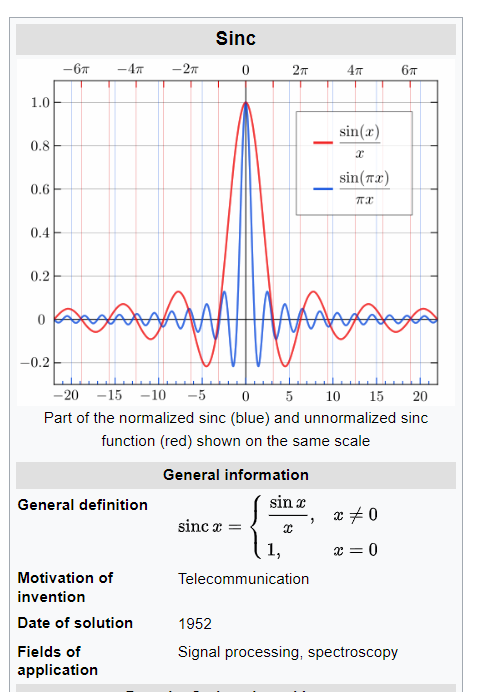

In [32]:
Image('./img/sinc.png')

In [33]:
x = np.linspace(-10,10,100)
# My sinc formula
y = [1 if x[i]==0 else np.sin(x[i])/x[i] for i in range(len(x))]
# Numpy sinc formula
np_y = np.sinc(x/np.pi)
fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=np_y, name='np sinc function'))
fig.add_trace(go.Scatter(x=x, y=y, name='my sinc function'))
fig.update_layout(title='sinc function', xaxis_title='x', yaxis_title='y')
fig.show()


In [34]:
np_y_df,y_df = pd.DataFrame(np_y), pd.DataFrame(y)
a = []
for iter in range(len(x)):
    val = np.sin(x[iter])/x[iter]
    a.append(val)
a_df = pd.DataFrame(np.array(a))
df = pd.concat([np_y_df,y_df,a_df], axis=1,)
df.columns = ['np sinc function', 'my sinc function', 'calculated sinc function']
df

,np sinc function,my sinc function,calculated sinc function
0,-0.054402,-0.054402,-0.054402
1,-0.037212,-0.037212,-0.037212
2,-0.017752,-0.017752,-0.017752
3,0.003282,0.003282,0.003282
4,0.025105,0.025105,0.025105
...,...,...,...
95,0.025105,0.025105,0.025105
96,0.003282,0.003282,0.003282
97,-0.017752,-0.017752,-0.017752
98,-0.037212,-0.037212,-0.037212
